# Explore here

In [1]:
pip install pandas scikit-learn matplotlib seaborn flask gunicorn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

## Step 1: Find a dataset

### Step 1.1 Read and perform EDA on the dataset
We'll explore another example using a dataset that has already been previously treated with a full EDA. 

In [3]:
# Load the iris dataset
iris = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable as species names
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].apply(lambda x: iris.target_names[x])

# Display the DataFrame
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


*Note: Be sure to perform full EDA on your dataset. This includes inspecting missing values, potentially dropping rows or columns with missing values, imputing missing values, scaling, etc.*

## Step 2: Develop a model

### Step 2.1 Separate the features and target

In [4]:
# Features
X = iris_df.drop('species', axis=1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# Target
y = iris_df['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

### Step 2.2 train/test Split
The *train* set will be used to train the model, while the *test* set will be used to evaluate the effectiveness of the model.

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


In [7]:
# Inspect X_train
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3


### Step 2.3 Model initialization and training

**Note**: Scaling is not necessary for decision trees so no need to include a scaler in our model pipeline. But perhaps we want to impute missing values for new data points. We can add a step in our pipeline to impute missing values.

In [8]:
# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Step to impute missing values
    ('classifier', DecisionTreeClassifier())      # Step to train a Decision Tree
])

# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier', DecisionTreeClassifier())])

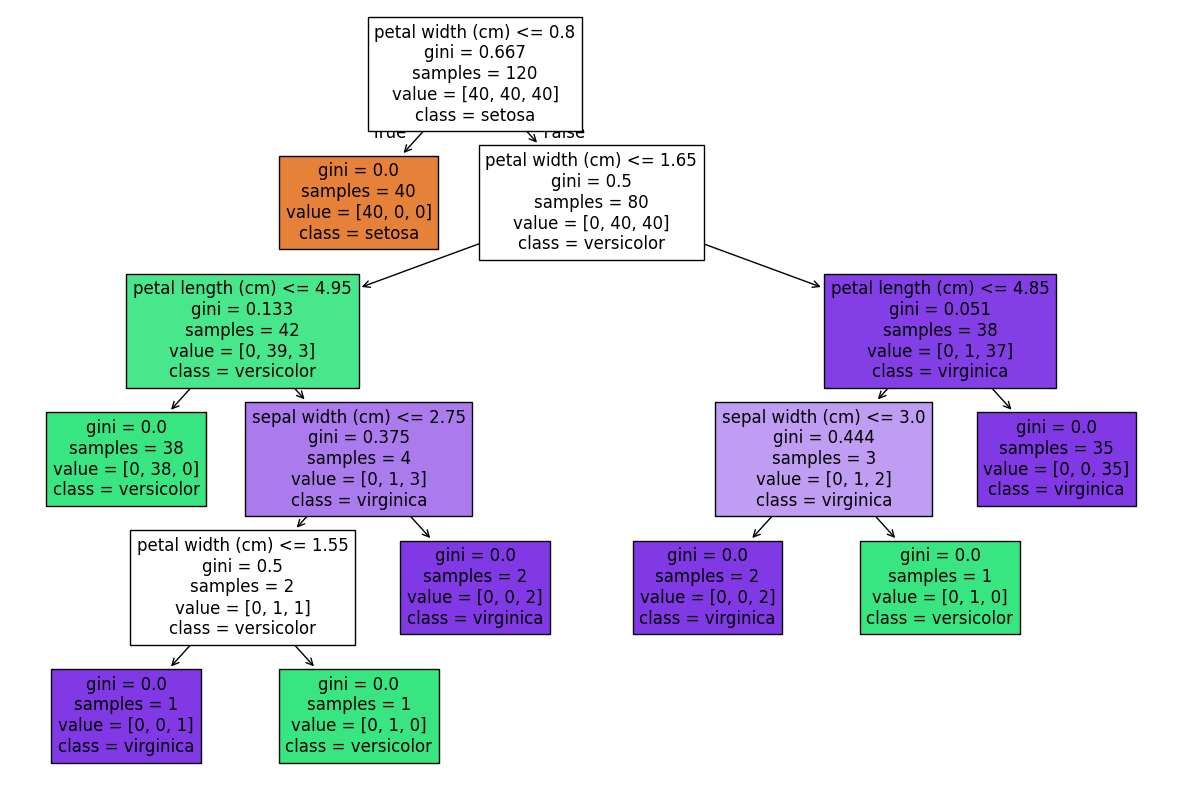

In [9]:
# Extract the trained Decision Tree from the pipeline
tree = pipeline.named_steps['classifier']

# Visualize the trained decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

### Step 2.4 Model Evaluation

In [10]:
# Predict the labels for the test set
y_pred = pipeline.predict(X_test)

test_df = X_test.copy()
test_df["species"] = y_test
test_df["Predictions"] = y_pred
test_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Predictions
38,4.4,3.0,1.3,0.2,setosa,setosa
127,6.1,3.0,4.9,1.8,virginica,virginica
57,4.9,2.4,3.3,1.0,versicolor,versicolor
93,5.0,2.3,3.3,1.0,versicolor,versicolor
42,4.4,3.2,1.3,0.2,setosa,setosa


Accuracy: 0.9667


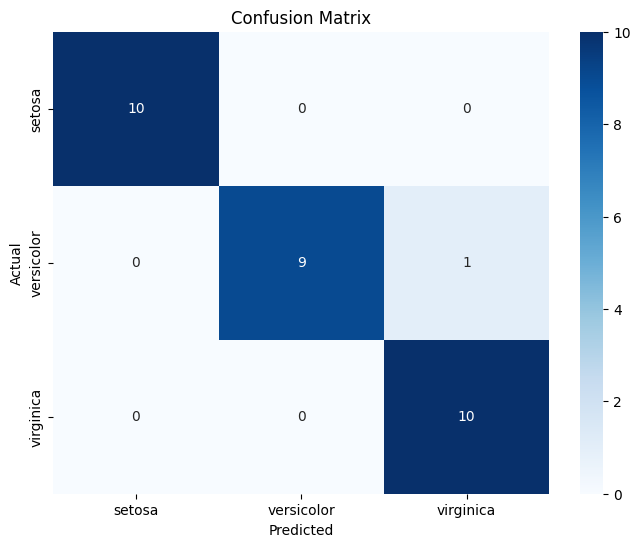

In [11]:
# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Step 2.5 Making Predictions

In [12]:
# New data point for prediction (example with some missing values)
new_data_point_dict = {
    'sepal length (cm)': [5.1],
    'sepal width (cm)': [3.5],
    'petal length (cm)': [np.nan],
    'petal width (cm)': [0.2]
}

# Convert the dictionary to a DataFrame
new_data_point_df = pd.DataFrame(new_data_point_dict)
new_data_point_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,NaN,0.2


In [13]:
# Predict the class of the new data point using the pipeline
new_prediction_class = pipeline.predict(new_data_point_df)[0]

print(f'The predicted class for the new data point is: {new_prediction_class}')

The predicted class for the new data point is: setosa


### Step 2.6 Save model

In [14]:
# Save the trained pipeline as a pickle file
with open('trained_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print('Pipeline saved as trained_pipeline.pkl')

Pipeline saved as trained_pipeline.pkl
